### Make a project plan for my Reddit data with 10 topics that we plan on exploring including business goal as well as technical proposal

- 1: What is the most popular dating APP?
  - Use NLP to identify the posts that mentioned one and more than one dating apps. Conduct sentiment analysis of the posts to assign positive or negative values to the dating apps mentioned in posts. Present the findings for the sentiment analysis for the top 3 popular dating apps.
- 2: What kind of dating/relationship is the most popular nowadays?
  - Utilize NLP to do the topic popularity calculation: Weighting the words with the hotness of the main posts, and the heat of the main post will take into account the following factors like the number of subreddits, score, time of the publication (The longer the release time, the higher the heat decay). Using Wordcloud to show the hottest words among the selected subreddits and extract key words to determine which types of dates are most popular. Age and gender factors can also be considered to categorize the study.
- 3: What is the sentiment composition of the posts in the subreddit and in each topic?
  - Visualize the pattern of text length of the comment data. Conduct the distribution of the length of text. Present text length of the most comments and the characteristic of reddit.
- 4: How are the scores of the posts/comments related to topics and sentiments?
  - Use NLP to identify the posts and comments and vectorize the dataset. Create a pipeline for sentiment analysis based on SparkNLP. Plot to demonstrate the difference of the distributions by sentiment and the score. 
- 5: How does people's attention about relationship health change over time?
  - Leverage Time series analysis to help understanding the underlying attention patterns of relationship over time. Using data visualizations, we want to see seasonal trends and year deviation and dig deeper into why these trends occur. When analyzing data over consistent intervals, we try to use time series forecasting to predict the likelihood of future dating events.
- 6: What is the difference between men's interest about women and women's interest about men?
  - Use NLP to collect and tokenize the submission with the most comment posts in "Ask Man" and "Ask Women" subreddit seperately. Conduct sentiment analysis of the submission to assign positive or negative values to questions redditors asked. Present top 10 positive and negative submission. Make the same process on comment part and compare the difference between men’s aspect and women’s aspect.
- 7: Which variables will have an impact on the submission score? what is the relationship between score and controversies?
  - Use NLP to transform string variables to numbers and assemble feature vectors. Build up a pipeline to transform all data. Use Linear Regression to predict score with feature selecting and tuning the model.
- 8: How does the popularity of posts distribute?
  - Visualize the distribution of the scores of posts. Conduct the highest frequency of the posts score. Present the findings of maximum and minimum value. 
- 9: which age group use online dating app the most?
  - Generate the distribution plot for each age group using created_utc which stands for the utc timestamp of the post time of the main post.
  Conduct statistical analysis for respondents from different age groups. Present sorted count for reddit users who have been using dating apps.
- 10: While talking about dating advices, which are the most frequent words?
  - Utilize NLP for word association calculation to examine the association between words by calculating the probability of simultaneous occurrence of words in subreddit. For example, the most associated word in a dinner date may be the most important suggestion in a dinner date. Can also use Association Rule Mining to calculate the relationship between words.

### Read the data
There are two folders `comments` and `submissions`, we will read both of them into separate Spark dataframes. The raw data is in [parquet format](https://www.databricks.com/glossary/what-is-parquet#:~:text=What%20is%20Parquet%3F,handle%20complex%20data%20in%20bulk.).

In [0]:
dbutils.fs.ls("abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet")

Out[1]: [FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments/', name='comments/', size=0, modificationTime=1666557328000),
 FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/submissions/', name='submissions/', size=0, modificationTime=1666559745000)]

In [0]:
comments = spark.read.parquet("abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments")
submissions = spark.read.parquet("abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/submissions")

In [0]:
#comments_row_count = comments.count()
#comment_col_count = len(comments.columns)

In [0]:
comments.show()

+------------------+--------------+----------------------+--------------------+--------------------+--------+----------------+-----------+-------------+------+------+-------+------------+---------+----------+--------------------+------------+-----+--------+--------------------+------------+
|            author|author_cakeday|author_flair_css_class|   author_flair_text|                body|can_gild|controversiality|created_utc|distinguished|edited|gilded|     id|is_submitter|  link_id| parent_id|           permalink|retrieved_on|score|stickied|           subreddit|subreddit_id|
+------------------+--------------+----------------------+--------------------+--------------------+--------+----------------+-----------+-------------+------+------+-------+------------+---------+----------+--------------------+------------+-----+--------+--------------------+------------+
|        FieldOfFox|          null|                  null|                null|  Music taste is bad|    true|               

In [0]:
comments.printSchema()

root
 |-- author: string (nullable = true)
 |-- author_cakeday: boolean (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: boolean (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- distinguished: string (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- id: string (nullable = true)
 |-- is_submitter: boolean (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- retrieved_on: long (nullable = true)
 |-- score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)



In [0]:
submissions.show()

+------------------+------------------+--------+-----------------+--------------+----------------------+--------------------+---------+----------+------------+-----------+----------------+---------------------+----------------+-------------+--------------------+---------------+------+----------+---------+------+------+----------+--------+------+---------+----------------+----------------------+-------+--------+--------------------+--------------------+------+--------------------+--------------------+-------------+------------+--------------+-------------+-------+-----------------------+--------------------+------+------------+--------------------+--------+-----------+---------------------+------------+------------+-----+--------------------+--------------------+--------------------+-------+--------+------------------+------------+--------------+--------------------+--------------------+----------------------+--------------------+----------------+---------------+--------------------+---

In [0]:
submissions.printSchema()

root
 |-- adserver_click_url: string (nullable = true)
 |-- adserver_imp_pixel: string (nullable = true)
 |-- archived: boolean (nullable = true)
 |-- author: string (nullable = true)
 |-- author_cakeday: boolean (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- author_id: string (nullable = true)
 |-- brand_safe: boolean (nullable = true)
 |-- contest_mode: boolean (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- crosspost_parent: string (nullable = true)
 |-- crosspost_parent_list: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- approved_at_utc: string (nullable = true)
 |    |    |-- approved_by: string (nullable = true)
 |    |    |-- archived: boolean (nullable = true)
 |    |    |-- author: string (nullable = true)
 |    |    |-- author_flair_css_class: string (nullable = true)
 |    |    |-- author_flair_text: string (nullable = true)
 |    |    |-- b

### Conduct your exploratory data analysis.

##### Update submissions and comments dataset by dropping useless or overlapped columns and changing column names

In [0]:
submissions_new = submissions.select('id','permalink','author','created_utc','subreddit','subreddit_id','selftext','title','num_comments','score','is_self',                              'over_18','edited','domain','stickied','locked','retrieved_on')
comments_new = comments.drop(comments.distinguished)\
                        .drop(comments.is_submitter)\
                        .drop(comments.permalink)\
                        .drop(comments.author_flair_css_class)\
                        .drop(comments.author_flair_text)\
                        .withColumnRenamed('id','comment_id')\
                        .withColumnRenamed('subreddit','comment_subreddit')\
                        .withColumnRenamed('score','comment_score')\
                        .withColumnRenamed('created_utc','comment_created_utc')

In [0]:
comments_new.printSchema()

root
 |-- author: string (nullable = true)
 |-- author_cakeday: boolean (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: boolean (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- comment_created_utc: long (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- comment_id: string (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- retrieved_on: long (nullable = true)
 |-- comment_score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- comment_subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)



In [0]:
submissions_new.printSchema()

root
 |-- id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- author: string (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)
 |-- selftext: string (nullable = true)
 |-- title: string (nullable = true)
 |-- num_comments: long (nullable = true)
 |-- score: long (nullable = true)
 |-- is_self: boolean (nullable = true)
 |-- over_18: boolean (nullable = true)
 |-- edited: string (nullable = true)
 |-- domain: string (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- locked: boolean (nullable = true)
 |-- retrieved_on: long (nullable = true)



In [0]:
for col in submissions_new.columns:
    print(col, "with null values: ", submissions_new.filter(submissions_new[col].isNull()).count())

id with null values:  0
permalink with null values:  0
author with null values:  0
created_utc with null values:  0
subreddit with null values:  0
subreddit_id with null values:  0
selftext with null values:  0
title with null values:  0
num_comments with null values:  0
score with null values:  0
is_self with null values:  0
over_18 with null values:  0
edited with null values:  486166
domain with null values:  9332589
stickied with null values:  0
locked with null values:  0
retrieved_on with null values:  199221102


In [0]:
for col in comments_new.columns:
    print(col, "with null values: ", comments_new.filter(comments_new[col].isNull()).count())

author with null values:  0
author_cakeday with null values:  4458532168
body with null values:  0
can_gild with null values:  0
controversiality with null values:  0
comment_created_utc with null values:  0
edited with null values:  0
gilded with null values:  0
comment_id with null values:  0
link_id with null values:  0
parent_id with null values:  0
retrieved_on with null values:  1031220301
comment_score with null values:  0
stickied with null values:  0
comment_subreddit with null values:  0
subreddit_id with null values:  0


In [0]:
print("Comments_new Dataframe has ", comments_new.count(), "Rows",  len(comments_new.columns), "Columns")
print("Submission_new Dataframe has ", submissions_new.count(), "Rows",  len(submissions_new.columns), "Columns")

Comments_new Dataframe has  4473556762 Rows 16 Columns
Submission_new Dataframe has  643255528 Rows 17 Columns


##### Drop columns which contain too many null values or are useless

In [0]:
#Delete "retrieve_on", because it contains too many null value and the crawling timestamp is usless for our analysis.
submissions_final = submissions_new.drop(submissions_new.retrieved_on) 

In [0]:
#Delete "retrieve_on" and "author_cakeday", because these variables contain too many null value and the crawling timestamp is usless for our analysis.
comments_final = comments_new.drop(comments_new.retrieved_on).drop(comments_new.author_cakeday)

######  Delete rows with null values for all datasets

In [0]:
#Delete rows where "edited" and "domain" contain null value because these two columns contains very few null values and are significant to our analysis.
submissions_final = submissions_final.dropna()

In [0]:
submissions_final.show(5)

+------+--------------------+----------------+-----------+-------------+------------+---------+--------------------+------------+-----+-------+-------+------+--------------------+--------+------+
|    id|           permalink|          author|created_utc|    subreddit|subreddit_id| selftext|               title|num_comments|score|is_self|over_18|edited|              domain|stickied|locked|
+------+--------------------+----------------+-----------+-------------+------------+---------+--------------------+------------+-----+-------+-------+------+--------------------+--------+------+
|lqcq88|/r/Brawlstars/com...|           amqwe| 1614066490|   Brawlstars|    t5_3k7ez|         |      Edgars be like|          17|  337|  false|  false| false|           v.redd.it|   false| false|
|lqcq89|/r/InspirobotBot/...|   InspirobotBot| 1614066491|InspirobotBot|   t5_3gzzey|         |Tue Feb 23 08:48:...|           0|    1|  false|  false| false|           i.redd.it|   false| false|
|lqcq8a|/r/Market76/

In [0]:
comments_final.show(5)

+-----------------+--------------------+--------+----------------+-------------------+------+------+----------+---------+----------+-------------+--------+--------------------+------------+
|           author|                body|can_gild|controversiality|comment_created_utc|edited|gilded|comment_id|  link_id| parent_id|comment_score|stickied|   comment_subreddit|subreddit_id|
+-----------------+--------------------+--------+----------------+-------------------+------+------+----------+---------+----------+-------------+--------+--------------------+------------+
|       FieldOfFox|  Music taste is bad|    true|               0|         1624437152| false|     0|   h2qxlzs|t3_o62mtb|t1_h2qvhl6|            1|   false|terriblefacebookm...|    t5_2tja6|
|        [deleted]|           [deleted]|    true|               0|         1624437153| false|     0|   h2qxlzt|t3_o67zgj| t3_o67zgj|            3|   false|            MNTrolls|    t5_3nenp|
|        [deleted]|On the basis of P...|   false| 

In [0]:
for col in submissions_final.columns:
    print(col, "with null values: ", submissions_final.filter(submissions_final[col].isNull()).count())

id with null values:  0
permalink with null values:  0
author with null values:  0
created_utc with null values:  0
subreddit with null values:  0
subreddit_id with null values:  0
selftext with null values:  0
title with null values:  0
num_comments with null values:  0
score with null values:  0
is_self with null values:  0
over_18 with null values:  0
edited with null values:  0
domain with null values:  0
stickied with null values:  0
locked with null values:  0


In [0]:
for col in comments_final.columns:
    print(col, "with null values: ", comments_final.filter(comments_final[col].isNull()).count())

author with null values:  0
body with null values:  0
can_gild with null values:  0
controversiality with null values:  0
comment_created_utc with null values:  0
edited with null values:  0
gilded with null values:  0
comment_id with null values:  0
link_id with null values:  0
parent_id with null values:  0
comment_score with null values:  0
stickied with null values:  0
comment_subreddit with null values:  0
subreddit_id with null values:  0


In [0]:
print("Comments_final Dataframe has ", comments_final.count(), "Rows",  len(comments_final.columns), "Columns")
print("Submissions_final Dataframe has ", submissions_final.count(), "Rows",  len(submissions_final.columns), "Columns")

Comments_final Dataframe has  4473556762 Rows 14 Columns
Submissions_final Dataframe has  633922939 Rows 16 Columns


#### Report on the basic info about your dataset.

After doing some basic data cleaning such as dropping useless or overlapped columns and renamed columns, our dataset contains updated submissions and comments datasets. `comments_final` contains 14 columns and 4473556762 rows in total.`subumissions_final` contains 16 columns and 633922939 rows. `num_comments` represents the number of comments associated with this submission, `score` represents the score of submission and is the number of upvotes minus the number of downvotes, `comment_score` represents the score of comments, and `controversiality` represents number that indicates whether the comment is controversial. Those four variables show how popular the submissions and comments are. In addition, `created_utc` refers to the timestamp of the submission’s creation, `over_18` indicates whether the submission is Not-Safe-For-Work.

In [0]:
#comments_final.write.parquet("/Dataset/comments_final")
#submissions_final.write.parquet("/Dataset/submissions_final")

In [0]:
comments_final = spark.read.parquet("/Dataset/comments_final")
submissions_final = spark.read.parquet("/Dataset/submissions_final")

In [0]:
from pyspark.sql.functions import *

In [0]:
## Extract subreddits from submissions
datingapp_df_submission = submissions_final.filter((col("subreddit")=='Bumble') | (col("subreddit")=='Tinder')|(col("subreddit")=='hingeapp')|(col("subreddit")=='dating')| (col("subreddit")=='DatingApps')).cache()

In [0]:
relationship_df_submission = submissions_final.filter((col("subreddit")=='relationships') | (col("subreddit")=='AskMen') | (col("subreddit")=='AskWomen')).cache()

In [0]:
advice_df_submission = submissions_final.filter((col("subreddit")=='relationship_advice') | (col("subreddit")=='datingoverforty')|(col("subreddit")=='datingoverthirty')| (col("subreddit")=='datingadvice')| (col("subreddit")=='datingoverforty')| (col("subreddit")=='datingoverfifty')).cache()

In [0]:
## Extract subreddits from comments
datingapp_df_comments = comments_final.filter((col("comment_subreddit")=='Bumble') | (col("comment_subreddit")=='Tinder')|(col("comment_subreddit")=='hingeapp')|(col("comment_subreddit")=='dating')| (col("comment_subreddit")=='DatingApps')).cache()

In [0]:
relationship_df_comments = comments_final.filter((col("comment_subreddit")=='relationships') | (col("comment_subreddit")=='AskMen') | (col("comment_subreddit")=='AskWomen')).cache()

In [0]:
advice_df_comments = comments_final.filter((col("comment_subreddit")=='relationship_advice') | (col("comment_subreddit")=='datingoverforty')|(col("comment_subreddit")=='datingoverthirty')| (col("comment_subreddit")=='datingadvice')| (col("comment_subreddit")=='datingoverforty')| (col("comment_subreddit")=='datingoverfifty')).cache()

#### Conduct basic data quality checks! Make sure there are no missing values, check the length of the comments, remove rows of data that might be corrupted. Even if you think all your data is perfect, you still need to demonstrate that with your analysis.

##### Datasets overview

In [0]:
print("Dating App Submissions Dataframe has ", datingapp_df_submission.count(), "Rows",  len(datingapp_df_submission.columns), "Columns")
print("Relationship Submissions Dataframe has ", relationship_df_submission.count(), "Rows",  len(relationship_df_submission.columns), "Columns")
print("Advice Submissions Dataframe has ", advice_df_submission.count(), "Rows",  len(advice_df_submission.columns), "Columns")

Dating App Submissions Dataframe has  429783 Rows 16 Columns
Relationship Submissions Dataframe has  951943 Rows 16 Columns
Advice Submissions Dataframe has  1321658 Rows 16 Columns


In [0]:
print("Dating App Comments Dataframe has ", datingapp_df_comments.count(), "Rows",  len(datingapp_df_comments.columns), "Columns")
print("Relationship Comments Dataframe has ", relationship_df_comments.count(), "Rows",  len(relationship_df_comments.columns), "Columns")
print("Advice Comments Dataframe has ", advice_df_comments.count(), "Rows",  len(advice_df_comments.columns), "Columns")

Dating App Comments Dataframe has  9619704 Rows 14 Columns
Relationship Comments Dataframe has  16360806 Rows 14 Columns
Advice Comments Dataframe has  18261900 Rows 14 Columns


##### Missing values check for all of the datasets we would like to use

In [0]:
for col in datingapp_df_submission.columns:
    print(col, "with null values: ", datingapp_df_submission.filter(datingapp_df_submission[col].isNull()).count())

id with null values:  0
permalink with null values:  0
author with null values:  0
created_utc with null values:  0
subreddit with null values:  0
subreddit_id with null values:  0
selftext with null values:  0
title with null values:  0
num_comments with null values:  0
score with null values:  0
is_self with null values:  0
over_18 with null values:  0
edited with null values:  0
domain with null values:  0
stickied with null values:  0
locked with null values:  0


In [0]:
for col in relationship_df_submission.columns:
    print(col, "with null values: ", relationship_df_submission.filter(relationship_df_submission[col].isNull()).count())

id with null values:  0
permalink with null values:  0
author with null values:  0
created_utc with null values:  0
subreddit with null values:  0
subreddit_id with null values:  0
selftext with null values:  0
title with null values:  0
num_comments with null values:  0
score with null values:  0
is_self with null values:  0
over_18 with null values:  0
edited with null values:  0
domain with null values:  0
stickied with null values:  0
locked with null values:  0


In [0]:
for col in advice_df_submission.columns:
    print(col, "with null values: ", advice_df_submission.filter(advice_df_submission[col].isNull()).count())

id with null values:  0
permalink with null values:  0
author with null values:  0
created_utc with null values:  0
subreddit with null values:  0
subreddit_id with null values:  0
selftext with null values:  0
title with null values:  0
num_comments with null values:  0
score with null values:  0
is_self with null values:  0
over_18 with null values:  0
edited with null values:  0
domain with null values:  0
stickied with null values:  0
locked with null values:  0


In [0]:
for col in datingapp_df_comments.columns:
    print(col, "with null values: ", advice_df_comments.filter(advice_df_comments[col].isNull()).count())

author with null values:  0
body with null values:  0
can_gild with null values:  0
controversiality with null values:  0
comment_created_utc with null values:  0
edited with null values:  0
gilded with null values:  0
comment_id with null values:  0
link_id with null values:  0
parent_id with null values:  0
comment_score with null values:  0
stickied with null values:  0
comment_subreddit with null values:  0
subreddit_id with null values:  0


In [0]:
for col in relationship_df_comments.columns:
    print(col, "with null values: ", advice_df_comments.filter(advice_df_comments[col].isNull()).count())

author with null values:  0
body with null values:  0
can_gild with null values:  0
controversiality with null values:  0
comment_created_utc with null values:  0
edited with null values:  0
gilded with null values:  0
comment_id with null values:  0
link_id with null values:  0
parent_id with null values:  0
comment_score with null values:  0
stickied with null values:  0
comment_subreddit with null values:  0
subreddit_id with null values:  0


In [0]:
for col in advice_df_comments.columns:
    print(col, "with null values: ", advice_df_comments.filter(advice_df_comments[col].isNull()).count())

author with null values:  0
body with null values:  0
can_gild with null values:  0
controversiality with null values:  0
comment_created_utc with null values:  0
edited with null values:  0
gilded with null values:  0
comment_id with null values:  0
link_id with null values:  0
parent_id with null values:  0
comment_score with null values:  0
stickied with null values:  0
comment_subreddit with null values:  0
subreddit_id with null values:  0


###### Make smaller datasets

In [0]:
datingapp_df_submission_small = datingapp_df_submission.limit(10000)
relationship_df_submission_small = relationship_df_submission.limit(10000)
advice_df_submission_small = advice_df_submission.limit(10000)
datingapp_df_comments_small = datingapp_df_comments.limit(10000)
relationship_df_comments_small = relationship_df_comments.limit(10000)
advice_df_comments_small = advice_df_comments.limit(10000)

In [0]:
# Write final dataframe into parquet files
datingapp_df_submission.write.parquet("/Dataset/datingapp_df_submission")
relationship_df_submission.write.parquet("/Dataset/relationship_df_submission")
advice_df_submission.write.parquet("/Dataset/advice_df_submission")
datingapp_df_comments.write.parquet("/Dataset/datingapp_df_comments")
relationship_df_comments.write.parquet("/Dataset/relationship_df_comments")
advice_df_comments.write.parquet("/Dataset/advice_df_comments")

#### Produce at least 5 interesting graphs about your dataset. Think about the dimensions that are interesting for your reddit data! There are millions of choices. Make sure your graphs are connected to your business questions.

In [0]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

###### Vis 1: The change of the number of people discussing 3 dating app over time

In [0]:
v1 = datingapp_df_submission.select("created_utc", "author", "subreddit", "title")
v1 = v1.withColumn("time", from_unixtime(col("created_utc"), "yyyy-MM-dd"))
v1= v1.withColumn("app", when(lower(v1.subreddit).rlike("bumble") | lower(v1.title).rlike("bumble"), "Bumble")
                              .when(lower(v1.subreddit).rlike("tinder") | lower(v1.title).rlike("tinder"), "Tinder")
                              .when(lower(v1.subreddit).rlike("hinge") | lower(v1.title).rlike("hinge"), "Hinge")
                              .otherwise("other"))
v1 = v1.withColumn('month', month(col('time')))
v1 = v1.withColumn('year', year(col('time')))
v1 = v1.withColumn('month_year', concat_ws('-',v1.year,v1.month))
v1_df = v1.groupby(['month_year','app']).count().sort(col("month_year"))

v1_df.show(5)

+----------+------+-----+
|month_year|   app|count|
+----------+------+-----+
|    2021-1|Bumble| 1536|
|    2021-1| Hinge| 1544|
|    2021-1| other| 5995|
|    2021-1|Tinder| 8869|
|   2021-10|Bumble| 2452|
+----------+------+-----+
only showing top 5 rows



In [0]:
v1_df=v1_df.toPandas()

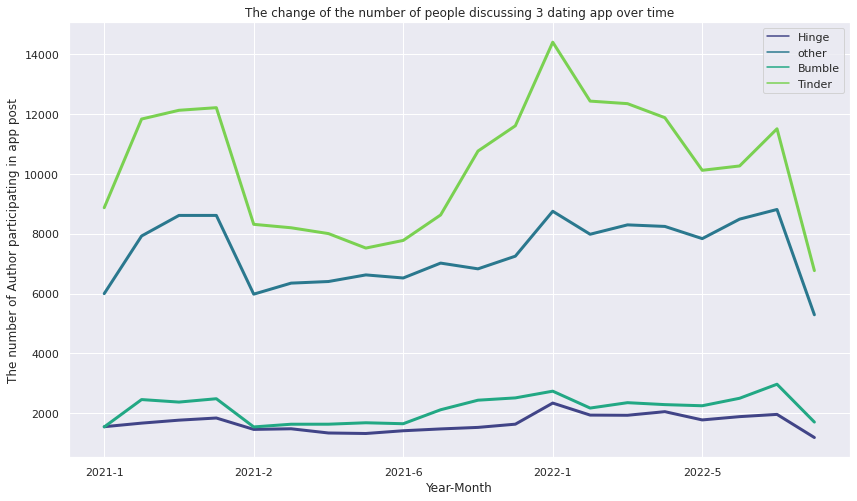

In [0]:

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=v1_df, x ='month_year', y = 'count',
                  hue='app', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('The number of Author participating in app post')
plt.xlabel('Year-Month')
plt.title("The change of the number of people discussing 3 dating app over time")
plt.show()

###### Vis 2: The score distribution of posts with different comment degrees

In [0]:
v2_1 = advice_df_comments_small.selectExpr("comment_score as score")
v2_2 = advice_df_submission_small.select("score")
v2_1 = v2_1.withColumn("label", lit("comment"))
v2_2 = v2_2.withColumn("label", lit("submission"))

In [0]:
v2=v2_1.unionByName(v2_2)
v2=v2.toPandas()

In [0]:
b = range(-20, 40, 2)

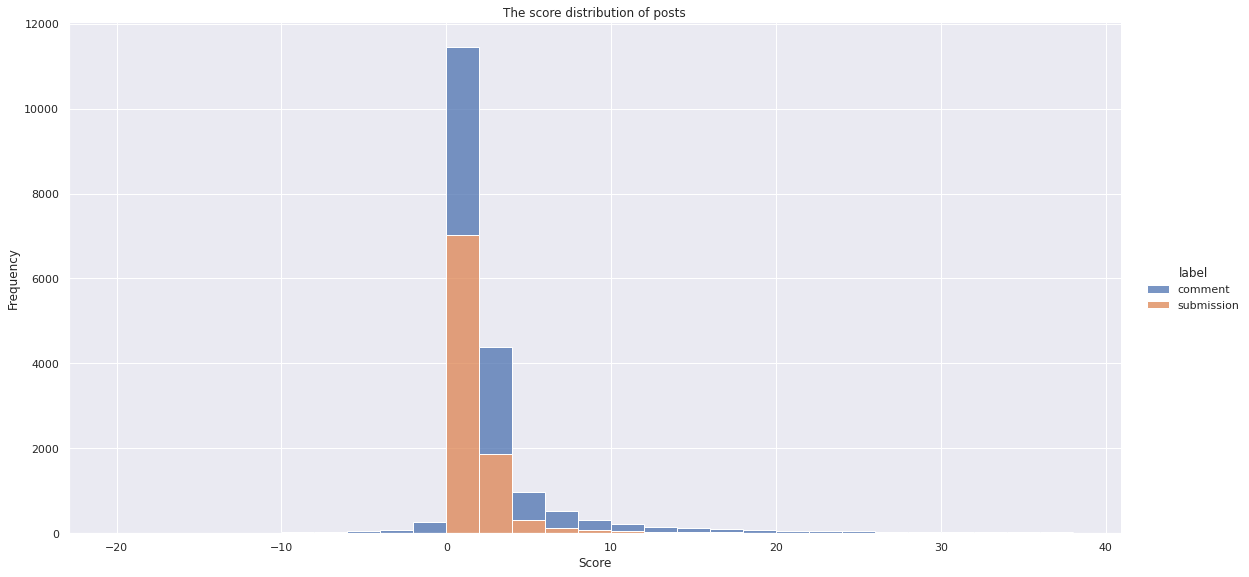

In [0]:
sns.displot(data=v2, x="score", hue="label", kde=False,bins=b, multiple="stack", aspect=2, height=8)
plt.ylabel('Frequency')
plt.xlabel('Score')
plt.title("The score distribution of posts")
plt.show()

###### Vis 3: The change of number of posts and comment scores in a week

In [0]:
df = submissions_final_small.groupby('day_of_week') \
       .agg({'id':'size', 'score':'mean'}) \
       .rename(columns={'id':'count','score':'mean'}) \
       .reset_index()
df['post'] = 'submission'

In [0]:
df_c = comments_final_small.groupby('day_of_week') \
       .agg({'comment_id':'size', 'comment_score':'mean'}) \
       .rename(columns={'comment_id':'count','comment_score':'mean'}) \
       .reset_index()
df_c['post'] = 'comment'

In [0]:
v3 = pd.concat([df, df_c], axis=0)

In [0]:
import plotly.express as px
fig = px.scatter(v3, x="day_of_week", y="mean", color="post",
                 size='count')
fig.update_traces(
    marker=dict(symbol="star-diamond", line=dict(width=2, color="DarkSlateGrey")),
    selector=dict(mode="markers"),
)
fig.show()

###### Vis 4: Submission Distribution

In [0]:
v4 = submissions_final_small
fig = px.scatter(v4, x="score", y="num_comments", color='over_18')
fig.show()

###### Vis 5: Age & Score boxplot

In [0]:
s = advice_df_submission_small.select("subreddit", "score")\
                            .withColumn('label',lit('submission'))
c = advice_df_comments_small.select("comment_subreddit", "comment_score")\
                        .withColumn('label',lit('comment'))
v5=s.union(c)
v5= v5.withColumn("age", when(lower(v5.subreddit).rlike("thirty"),"thirty")
                              .when(lower(v5.subreddit).rlike("forty"), "forty")
                              .when(lower(v5.subreddit).rlike("fifty"), "fifty")
                              .otherwise("other"))

In [0]:
v5=v5.toPandas()
v5 = v5.loc[v5['age']!='other']

Out[205]: <AxesSubplot:xlabel='age', ylabel='score'>

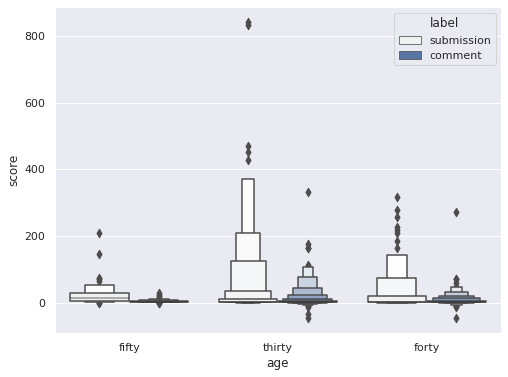

In [0]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(8,6)})

sns.boxenplot(x="age", y="score",
              color="b", hue="label",
              scale="linear", data=v5)

#### Produce at least 3 interesting summary tables about your dataset. You can decide how to split up your data into categories, time slices, etc. There are infinite ways you can make summary statistics. Be unique, creative, and interesting!

In [0]:
# read data from parquet
comments_final = spark.read.parquet("/Dataset/comments_final")
submissions_final = spark.read.parquet("/Dataset/submissions_final")

In [0]:
# create small dataset
from random import sample
comments_final_small_table = comments_final.sample(True, 0.00001, 1234)
submissions_final_small_table = submissions_final.sample(True, 0.00001, 1234)

##### Table 1 - relationship between controversiality and score

In [0]:
import pyspark.sql.functions as f
from pyspark.sql.functions import *
df_com_1 = comments_final_small_table.filter(col("controversiality")==1).select("controversiality", "comment_score", 'stickied')
df_com_0 = comments_final_small_table.filter(col("controversiality")==0).select("controversiality", "comment_score", 'stickied')
df_union = df_com_1.union(df_com_0)

In [0]:
df_union.groupBy('controversiality').agg(f.count('comment_score').alias('count'),
         f.mean('comment_score').alias('mean'),
         f.stddev('comment_score').alias('std'),
         f.min('comment_score').alias('min'),
         f.expr('percentile(comment_score, array(0.25))')[0].alias('%25'),
         f.expr('percentile(comment_score, array(0.5))')[0].alias('%50'),
         f.expr('percentile(comment_score, array(0.75))')[0].alias('%75'),
         f.max('comment_score').alias('max')).show()

+----------------+-----+-------------------+-----------------+----+----+---+---+----+
|controversiality|count|               mean|              std| min| %25|%50|%75| max|
+----------------+-----+-------------------+-----------------+----+----+---+---+----+
|               0|43757| 7.2888909203098935|62.49297924364178|-184| 1.0|1.0|3.0|5748|
|               1|  793|0.29760403530895335|4.627509617732404| -30|-1.0|0.0|2.0|  26|
+----------------+-----+-------------------+-----------------+----+----+---+---+----+



For "controversiality", we can see that the count of controversial comments is obviously less than that of uncontroversial comments, and controversial comments have smaller mean of scores but less standard deviation. This means the scores are more intensive than less controversial ones.

##### Table 2 - relationship between submission score and whether the submission is Not-Safe-For-Work

In [0]:
# Select data
df_sub_T = submissions_final_small_table.filter(col("over_18")=='true').select("over_18", "score",'num_comments')
df_sub_F = submissions_final_small_table.filter(col("over_18")=='false').select("over_18", "score",'num_comments')
df_union_sub = df_sub_T.union(df_sub_F)

In [0]:
# Create the table
df_union_sub.groupBy('over_18').agg(f.count('score').alias('count'),
         f.mean('score').alias('mean'),
         f.stddev('score').alias('std'),
         f.min('score').alias('min'),
         f.expr('percentile(score, array(0.25))')[0].alias('%25'),
         f.expr('percentile(score, array(0.5))')[0].alias('%50'),
         f.expr('percentile(score, array(0.75))')[0].alias('%75'),
         f.max('score').alias('max')).show()

+-------+-----+------------------+------------------+---+---+---+----+-----+
|over_18|count|              mean|               std|min|%25|%50| %75|  max|
+-------+-----+------------------+------------------+---+---+---+----+-----+
|   true| 2307|27.918508885999135|148.53656556378368|  0|1.0|2.0| 9.0| 3811|
|  false| 4112|  66.8000972762646| 599.6246494139984|  0|1.0|1.0|11.0|18905|
+-------+-----+------------------+------------------+---+---+---+----+-----+



The variable `over_18` is a flag that indicates whether the submission is Not-Safe-For-Work. From the above table, we can see that the count of over 18 submission is less than that of not over 18 submissions, and over 18 have smaller mean of scores but less standard deviation. This means the scores are more intensive to those over 18 submissions.

##### Table 3 - Summary table of submission score, number of comments

In [0]:
submissions_final_small_table1.select('score', 'num_comments').describe().show()

+-------+-----------------+------------------+
|summary|            score|      num_comments|
+-------+-----------------+------------------+
|  count|             6419|              6419|
|   mean|52.82598535597445| 5.867113257516747|
| stddev|488.4487803922043|27.032290420877576|
|    min|                0|                 0|
|    max|            18905|               889|
+-------+-----------------+------------------+



The above summary table shows the statistics summary of the score that the submission has accumulated, as well as the number of comments. We can see the range of score is very large, the min value is 0 and max value is up to 18905, but the mean score is only 52.8. And the same phenomenon applies to the number of comments. This means that though most comments did not call much attention, several did receive vast amount of upvates and comments.

#### Use data transformations to make AT LEAST 3 new variables that are relevant for your business questions. We cannot be more specific because this really depends on your project and what you want to explore!

###### New variables we have so far: datingapp_df_submission_small, relationship_df_submission_small, advice_df_submission_small, datingapp_df_comments_small, relationship_df_comments_small, advice_df_comments_small

###### Create smaller datasets for comments_final and submissions_final, sample function is used here because we would like to have random samples, comments_final_small dataset has 44969 rows and submissions_final_small has 6302 rows with fraction = 0.00001

In [0]:
from random import sample
comments_final_small = comments_final.sample(True, 0.00001, 1234)
submissions_final_small = submissions_final.sample(True, 0.00001, 1234)

In [0]:
comments_final_small.limit(5).toPandas().head()

,author,body,can_gild,controversiality,comment_created_utc,edited,gilded,comment_id,link_id,parent_id,comment_score,stickied,comment_subreddit,subreddit_id
0,AstronautJolly9322,Something you can’t control so kinda,True,0,1649701685,false,0,i4bre72,t3_u1eb20,t3_u1eb20,2,False,NoStupidQuestions,t5_2w844
1,Dsaisiasd,My money is on Carolina to take him,True,0,1649701685,false,0,i4bre7d,t3_u19p8t,t1_i4bmbvh,1,False,rangers,t5_2rnpb
2,Complex-Ad7354,omg dm me right now 😋,True,0,1649701686,false,0,i4brecp,t3_u1e9bw,t1_i4bqsbx,1,False,YoungGirlsGoneWild,t5_snzlr
3,wu-wei,Removed. Use a search engine. There's a sticky...,True,0,1649701690,false,0,i4brene,t3_u1e7tf,t3_u1e7tf,1,False,kauai,t5_2rfam
4,LouisDrake86,"dumb question, but does ayato get the speed bu...",True,0,1649701691,false,0,i4breu0,t3_tshhuk,t3_tshhuk,1,False,Ayato_Mains,t5_4k3gid


In [0]:
comments_final_small.printSchema()

root
 |-- author: string (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: boolean (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- comment_created_utc: long (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- comment_id: string (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- comment_score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- comment_subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)



In [0]:
submissions_final_small.printSchema()

root
 |-- id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- author: string (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)
 |-- selftext: string (nullable = true)
 |-- title: string (nullable = true)
 |-- num_comments: long (nullable = true)
 |-- score: long (nullable = true)
 |-- is_self: boolean (nullable = true)
 |-- over_18: boolean (nullable = true)
 |-- edited: string (nullable = true)
 |-- domain: string (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- locked: boolean (nullable = true)



###### Since we would like to explore the fluctuations of number of main posts and comments in a week or at different time slots in a day, we create dummy variables called "day_of_week" and "hour" here using the variable "created_utc" in both comments_final_small and submissions_final_small datasets

In [0]:
from datetime import datetime

comments_final_small = comments_final_small.toPandas()
comments_final_small['day_of_week'] = comments_final_small['comment_created_utc'].map(lambda x: datetime.utcfromtimestamp(int(x)).strftime("%A"))
comments_final_small['hour'] = comments_final_small['comment_created_utc'].map(lambda x: datetime.utcfromtimestamp(int(x)).strftime("%H"))

In [0]:
submissions_final_small = submissions_final_small.toPandas()
submissions_final_small['day_of_week'] = submissions_final_small['created_utc'].map(lambda x: datetime.utcfromtimestamp(int(x)).strftime("%A"))
submissions_final_small['hour'] = submissions_final_small['created_utc'].map(lambda x: datetime.utcfromtimestamp(int(x)).strftime("%H"))

In [0]:
submissions_final_small_sp = spark.createDataFrame(submissions_final_small)
submissions_final_small_sp.select('score', 'num_comments').describe().show()

+-------+------------------+------------------+
|summary|             score|      num_comments|
+-------+------------------+------------------+
|  count|              6302|              6302|
|   mean|  77.1618533798794|6.5821961282132655|
| stddev|1260.0605640700421| 57.64797334448254|
|    min|                 0|                 0|
|    max|             64113|              3204|
+-------+------------------+------------------+



###### Hotness variable is created here based on different number of comments the posts have to describe the popularity of the post

In [0]:
hotness = []
for count in submissions_final_small['num_comments']:
    if count > 10 : hotness.append('popular')
    else:   
        hotness.append('unpopular')
submissions_final_small['hotness'] = hotness

In [0]:
hotness_dis = submissions_final_small.groupby(['hotness'])['id'].count().to_frame()
hotness_dis

,id
hotness,
popular,688
unpopular,5614


###### Also, according to the score which is number of upvotes minus downvotes from comments_final_small and submissions_final_small datasets, we split user's satisfaction of main posts into 'high', 'medium' and 'low'.

In [0]:
satisfaction = []
for score in submissions_final_small['score']:
    if score > 100 : satisfaction.append('high')
    elif 10 < score <= 100: satisfaction.append('medium')
    else:   
        satisfaction.append('low')
submissions_final_small['satisfaction'] = satisfaction

In [0]:
satisfaction_dis = submissions_final_small.groupby(['satisfaction'])['id'].count().to_frame()
satisfaction_dis

,id
satisfaction,
high,409
low,4753
medium,1140


###### Since there are negative values in comments_final_small dataset, we split user's satisfaction into 4 groups: 'high', 'medium', 'low' and 'dissatisfied'.

In [0]:
comments_final_small_sp = spark.createDataFrame(comments_final_small)
comments_final_small_sp.select('comment_score').describe().show()

+-------+------------------+
|summary|     comment_score|
+-------+------------------+
|  count|             44969|
|   mean| 7.538504302964264|
| stddev|147.36109141985304|
|    min|              -129|
|    max|             27257|
+-------+------------------+



In [0]:
satisfaction_c = []
for score_c in comments_final_small['comment_score']:
    if score_c > 10 : satisfaction_c.append('high')
    elif 2 < score_c <= 10: satisfaction_c.append('medium')
    elif 0 < score_c <= 2:  satisfaction_c.append('low')
    else:   
        satisfaction_c.append('dissatisfied')
comments_final_small['satisfaction'] = satisfaction_c

In [0]:
satisfaction_dis_c = comments_final_small.groupby(['satisfaction'])['link_id'].count().to_frame()
satisfaction_dis_c

,link_id
satisfaction,
dissatisfied,2976
high,4403
low,27660
medium,9930


#### Implement regex searches for specific keywords of interest to produce dummy variables and then make statistics that are related to your business questions. Note, you DO NOT have to do textual cleaning of the data at this point. The next assignment on NLP will focus on the textual cleaning and analysis aspect.

In [0]:
submissions_final_small_1 = submissions_final.limit(10000)
comments_final_small_1 = comments_final.limit(10000)

In [0]:
import pandas as pd
pd.set_option('display.max_columns', None)
submissions_final_small_1.limit(5).toPandas().head()

,id,permalink,author,created_utc,subreddit,subreddit_id,selftext,title,num_comments,score,is_self,over_18,edited,domain,stickied,locked,day_of_week,hour
0,v0jua9,/r/Sexysugarbaby/comments/v0jua9/worship_me/,Domiaanaa,1653856644,Sexysugarbaby,t5_28r1zr,,Worship me ✨,1,3,False,True,false,v.redd.it,False,False,Sunday,20
1,v0juaa,/r/23andme/comments/v0juaa/polska_result_with_...,Middlefingerjames21,1653856644,23andme,t5_2scn9,,Polska result with photo,0,1,False,False,false,reddit.com,False,False,Sunday,20
2,v0juab,/r/Sauna/comments/v0juab/15_amp_circuit_for_3_...,possiblyraspberries,1653856644,Sauna,t5_2uxn7,"Hi,\n\nDoes anyone have any recommendations fo...",15 amp circuit for 3 person sauna?,3,2,True,False,false,self.Sauna,False,False,Sunday,20
3,v0juac,/r/YoungHungFullofCum/comments/v0juac/i_want_t...,Oliverslloyd,1653856644,YoungHungFullofCum,t5_2iqrf0,,I want to know what you’d do to me.,0,6,False,True,false,i.redd.it,False,False,Sunday,20
4,v0juad,/r/FreeKarma4You/comments/v0juad/hurricane_aga...,littlekind,1653856644,FreeKarma4You,t5_3f1iq,[removed],Hurricane Agatha strengthening south of Mexico.,0,1,True,False,false,self.FreeKarma4You,False,False,Sunday,20


In [0]:
comments_final_small_1.limit(5).toPandas().head()

,author,body,can_gild,controversiality,comment_created_utc,edited,gilded,comment_id,link_id,parent_id,comment_score,stickied,comment_subreddit,subreddit_id,day_of_week,hour
0,fragmented_mask,"The filter system is broken though, because if...",True,0,1644530679,false,0,hwfe0l6,t3_sp87us,t1_hwf6byr,6,False,Sims4,t5_2x5o7,Thursday,22
1,whethervayne,Like a leaf on the wind.,True,0,1644530679,false,0,hwfe0l7,t3_sp6kk2,t1_hwdpabq,2,False,CFB,t5_2qm9d,Thursday,22
2,Early-Berry4156,The economy can resume when freedom improves,True,1,1644530679,false,0,hwfe0l8,t3_spblp7,t1_hwec4wj,-27,False,worldnews,t5_2qh13,Thursday,22
3,[deleted],Excuse me? I mean it when I say I didn't buy i...,False,0,1644530679,1.644535496E9,0,hwfe0l9,t3_spdh4m,t1_hwf3kux,3,False,starcitizen,t5_2v94d,Thursday,22
4,AutoModerator,hornyyytwinky is **not** a verified user at r/...,True,0,1644530679,false,0,hwfe0la,t3_spido5,t3_spido5,1,False,DadsAndBoys,t5_rparc,Thursday,22


In [0]:
## in order to solve the question "How does people's attention about relationship health", we decided to add a dummy variable which contains whether users care about the words like "healthy relation" using regex.
relationship_df_comments_regex = relationship_df_comments.withColumn('health_dummy', col('body').rlike("healthy relation*"))

In [0]:
relationship_df_comments_regex.filter(col('health_dummy')==True).select('body').show(5, truncate = False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [0]:
#Statistics
relationship_df_comments_regex.filter(col('health_dummy')==True).select('health_dummy').count()

Out[75]: 16337241

In [0]:
relationship_df_comments_regex.filter(col('health_dummy')==False).select('health_dummy').count()

Out[86]: 16337241

In [0]:
## Repeat regex for relationship_df_submissions dataset
relationship_df_submissions_regex = relationship_df_submission.withColumn('health_dummy', col('selftext').rlike("healthy relation*"))

In [0]:
relationship_df_submissions_regex.filter(col('health_dummy')==True).select('selftext').show(5, truncate = False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [0]:
#Statistics
relationship_df_submissions_regex.filter(col('health_dummy')==True).select('health_dummy').count()

Out[87]: 903

In [0]:
relationship_df_submissions_regex.filter(col('health_dummy')==False).select('health_dummy').count()

Out[89]: 951040

#### External Dataset

The External Dataset is the `appreview_df`, which contains the reviews and ratings for popular dating apps. The data is from 2017-2022 and the author acquired the data using googleplayscraper from google playstore online. Here is the data link: https://www.kaggle.com/datasets/sidharthkriplani/datingappreviews

We want to use this external dataset to solve the problem related to  dating app trend and popularity.

In [0]:
appreview_df = spark.read.csv("/FileStore/DatingAppReviewsDataset.csv",header = True)
appreview_df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Review: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- #ThumbsUp: string (nullable = true)
 |-- Date&Time: string (nullable = true)
 |-- App: string (nullable = true)



In [0]:
print("appreview_df has ", appreview_df.count(), "Rows",  len(appreview_df.columns), "Columns")

appreview_df has  701217 Rows 7 Columns


In [0]:
appreview_df.show(5)

+---+----------------+--------------------+------+---------+----------------+------+
|_c0|            Name|              Review|Rating|#ThumbsUp|       Date&Time|   App|
+---+----------------+--------------------+------+---------+----------------+------+
|  0|   linah sibanda|On this app i can...|     5|        0|18-02-2022 01:19|Tinder|
|  1|  Norman Johnson|Tinder would be s...|     3|        0|18-02-2022 01:16|Tinder|
|  2|      David Hume|Still doesn't cor...|     1|        0|18-02-2022 01:11|Tinder|
|  3| Last 1 Standing|"Got banned becau...|     2|        0|18-02-2022 01:11|Tinder|
|  4|Arthur Magamedov|            Love it!|     5|        0|18-02-2022 01:06|Tinder|
+---+----------------+--------------------+------+---------+----------------+------+
only showing top 5 rows



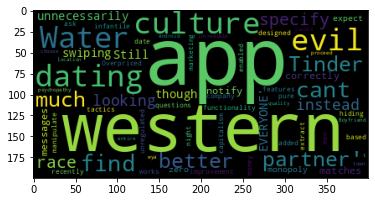

In [0]:
mytext = appreview_df.select("Review").toPandas().values 

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords).generate(str(mytext))
plt.imshow(wordcloud)
plt.show()

In [0]:
# Find Outliers and delete these rows
appreview_df.select('Rating').where(appreview_df.Rating>5).count()
appreview_df = appreview_df.where(appreview_df.Rating<=5)
appreview_df = appreview_df.where(appreview_df.Rating>=0)

In [0]:
appreview_df.select('Rating').describe().show()

+-------+------------------+
|summary|            Rating|
+-------+------------------+
|  count|            665608|
|   mean|3.0096513408062116|
| stddev|1.7542554438936249|
|    min|                 .|
|    max|                 5|
+-------+------------------+

